# Load the Data

In [1]:
import pandas as pd

In [2]:
path = "data_example.xlsx"
window = pd.read_excel(path, sheet_name=0)
linux = pd.read_excel(path, sheet_name=1)

In [3]:
window.tail()

,time,hostname,matric,service,warn,crit,max,unit,value
96,1557831379000000000,rt-mdl01-p1.idolrt.regione.toscana.it,Win,Diskspace,9663204556.8,6442136371200000,64421363712,bytes,63447236608
97,1557831379000000000,rt-mdl01-p1.idolrt.regione.toscana.it,Win,Diskspace,16050762547199900,10700508364800000,107005083648,bytes,86299901952
98,1557831392000000000,rt-sccm01-p1.idolrt.regione.toscana.it,Win,Diskspace,8375091855359990,55833945702.4,558339457024,bytes,274455330816
99,1557831392000000000,rt-sccm01-p1.idolrt.regione.toscana.it,Win,Diskspace,16050762547199900,10700508364800000,107005083648,bytes,48205135872
100,1557831558000000000,rt-mdl01-p1.idolrt.regione.toscana.it,Win,Diskspace,9663204556.8,6442136371200000,64421363712,bytes,63447236608


In [4]:
linux.tail()

,time,device,free,fstype,host,inodes_free,inodes_total,mode,path,total,used_percent
46,1544801020000000000,mapper/vg00-lvtmp,2093359104,xfs,titlmsueyea01.it.corp.leroymerlin.com,1047498,1048576,rw,/tmp,2136997888,2042060230618250
47,1544801020000000000,mapper/vg00-lvvar,25334362112,xfs,titlmsueyea01.it.corp.leroymerlin.com,12578358,12582912,rw,/var,25759318016,16497172158674500
48,1544801020000000000,rootfs,6341922816,rootfs,titlmsueyea01.it.corp.leroymerlin.com,4112269,4194304,rw,/,8579448832,26080067144341200
49,1544801020000000000,sda1,384974848,xfs,titlmsueyea01.it.corp.leroymerlin.com,261817,262144,rw,/boot,533368832,2782202016633770
50,1544801030000000000,mapper/vg00-lvdata,9153642496,xfs,titlmsueyea01.it.corp.leroymerlin.com,4718525,4718592,rw,/data,9653190656,5174953834455780


# Get all the Hosts

In [5]:
host = list(linux["host"].unique())
host

['----', 'titlmsueyea01.it.corp.leroymerlin.com']

# Validate the hosts

In [6]:
import re
pattern = re.compile(".+?\..+?(\..+?)*")

In [7]:
host = [x for x in host if re.match(pattern, x)]
host

['titlmsueyea01.it.corp.leroymerlin.com']

# Filter the data for that host

In [8]:
host = host[0]

In [9]:
h_l = linux.loc[linux["host"] == host]

In [10]:
h_l.tail()

,time,device,free,fstype,host,inodes_free,inodes_total,mode,path,total,used_percent
46,1544801020000000000,mapper/vg00-lvtmp,2093359104,xfs,titlmsueyea01.it.corp.leroymerlin.com,1047498,1048576,rw,/tmp,2136997888,2042060230618250
47,1544801020000000000,mapper/vg00-lvvar,25334362112,xfs,titlmsueyea01.it.corp.leroymerlin.com,12578358,12582912,rw,/var,25759318016,16497172158674500
48,1544801020000000000,rootfs,6341922816,rootfs,titlmsueyea01.it.corp.leroymerlin.com,4112269,4194304,rw,/,8579448832,26080067144341200
49,1544801020000000000,sda1,384974848,xfs,titlmsueyea01.it.corp.leroymerlin.com,261817,262144,rw,/boot,533368832,2782202016633770
50,1544801030000000000,mapper/vg00-lvdata,9153642496,xfs,titlmsueyea01.it.corp.leroymerlin.com,4718525,4718592,rw,/data,9653190656,5174953834455780


# Get all the devices for that host

In [11]:
h_l_devices = list(h_l["device"].unique())
h_l_devices

['mapper/vg00-lvdata',
 'mapper/vg00-lvneteye',
 'mapper/vg00-lvroot',
 'mapper/vg00-lvtmp',
 'mapper/vg00-lvvar',
 'rootfs',
 'sda1',
 'used percent']

# Filter the data for the host and the device

In [12]:
device = h_l_devices[0]

In [13]:
h_l_d = h_l.loc[linux["device"] == device]
h_l_d

,time,device,free,fstype,host,inodes_free,inodes_total,mode,path,total,used_percent
1,1544800960000000000,mapper/vg00-lvdata,9153642496,xfs,titlmsueyea01.it.corp.leroymerlin.com,4718525,4718592,rw,/data,9653190656,5174953834455780
8,1544800970000000000,mapper/vg00-lvdata,9153642496,xfs,titlmsueyea01.it.corp.leroymerlin.com,4718525,4718592,rw,/data,9653190656,5174953834455780
15,1544800980000000000,mapper/vg00-lvdata,9153642496,xfs,titlmsueyea01.it.corp.leroymerlin.com,4718525,4718592,rw,/data,9653190656,5174953834455780
22,1544800990000000000,mapper/vg00-lvdata,9153642496,xfs,titlmsueyea01.it.corp.leroymerlin.com,4718525,4718592,rw,/data,9653190656,5174953834455780
29,1544801000000000000,mapper/vg00-lvdata,9153642496,xfs,titlmsueyea01.it.corp.leroymerlin.com,4718525,4718592,rw,/data,9653190656,5174953834455780
36,1544801010000000000,mapper/vg00-lvdata,9153642496,xfs,titlmsueyea01.it.corp.leroymerlin.com,4718525,4718592,rw,/data,9653190656,5174953834455780
43,1544801020000000000,mapper/vg00-lvdata,9153642496,xfs,titlmsueyea01.it.corp.leroymerlin.com,4718525,4718592,rw,/data,9653190656,5174953834455780
50,1544801030000000000,mapper/vg00-lvdata,9153642496,xfs,titlmsueyea01.it.corp.leroymerlin.com,4718525,4718592,rw,/data,9653190656,5174953834455780


# Extract the columns needed for the analysis

In [14]:
data = h_l_d[["time", "used_percent"]].astype('int64')

In [15]:
data.used_percent /= 1e16

In [16]:
data

,time,used_percent
1,1544800960000000000,0.517495
8,1544800970000000000,0.517495
15,1544800980000000000,0.517495
22,1544800990000000000,0.517495
29,1544801000000000000,0.517495
36,1544801010000000000,0.517495
43,1544801020000000000,0.517495
50,1544801030000000000,0.517495


# Analyze the data

In [17]:
data.describe()

,time,used_percent
count,8.000000e+00,8.000000e+00
mean,1.544801e+18,5.174954e-01
std,2.449490e+10,1.186878e-16
min,1.544801e+18,5.174954e-01
25%,1.544801e+18,5.174954e-01
50%,1.544801e+18,5.174954e-01
75%,1.544801e+18,5.174954e-01
max,1.544801e+18,5.174954e-01


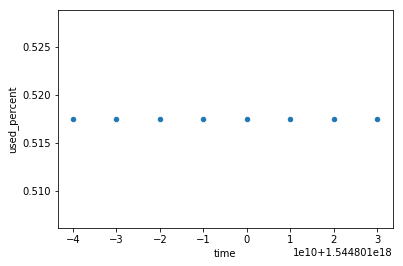

In [19]:
data.plot.scatter("time", "used_percent")